# EXERCISE 2: Shallow networks on CIFAR10

Implementation for exercise 2.

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print(f'OK: TensorFlow {tf_version} >= 2.0.0' + '.\033[0m')

print("Available devices: ")
print(tf.config.list_physical_devices())

OK: TensorFlow 2.10.0 >= 2.0.0.
Available devices: 
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Loading the raw data
Keras provides easy access to different datasets. First load the `cifar10` dataset and normalize it to be in the range [0, 1]

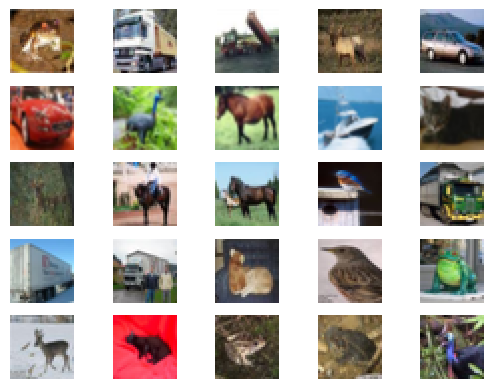

In [17]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and validation sets
(X_train, y_train), (X_val, y_val) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [18]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_val.shape: (10000, 32, 32, 3)
y_val.shape: (10000, 1)


In [19]:
#X_train = tf.reduce_mean(X_train, axis=3)
#X_val = tf.reduce_mean(X_val, axis=3)
#print(X_train.shape)
X_train = X_train.reshape((50000, -1)) # change the shape towards (60000, 784)
X_val =  X_val.reshape((10000, -1))  # idem (10000, 784)
X_train = X_train.astype('float32') # change the type towards float32
X_val =  X_val.astype('float32') # idem
X_train /= 255 # normalize the range to be between 0.0 and 1.0
X_val /= 255 # normalize the range to be between 0.0 and 1.0

print(f"X_train.shape: {X_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'test samples')

X_train.shape: (50000, 3072)
X_val.shape: (10000, 3072)
50000 train samples
10000 test samples


In [24]:
print(X_train[0])

[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [23]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_val = keras.utils.to_categorical(y_val, n_classes) # idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer model

In [25]:
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf


def singleLayerModel(name, inputshape):
    model = keras.models.Sequential(name=name)

    model.add(Dense(units=10, activation='linear', input_shape=(inputshape,), kernel_regularizer=tf.keras.regularizers.l2(0.05)))
    model.add(Activation('softmax'))

    return model

D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

sl_model = singleLayerModel("SLM1", D)
sl_model.build((D,))

# compile model
sl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# ... print model information with summary() method
sl_model.summary()


Model: "SLM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Train the single layer model

In [26]:
nepochs = 5           # number of epochs
nbatch = 128          # batch size

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
                                                                    # use validation set in real life
log_sl = sl_model.fit(X_train, Y_train, batch_size=nbatch, epochs=nepochs, validation_data=(X_val, Y_val))

Epoch 1/5
391/391 [==============================] - 2s 3ms/step - loss: 2.2908 - accuracy: 0.3067 - val_loss: 2.0198 - val_accuracy: 0.3201
Epoch 2/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9927 - accuracy: 0.3302 - val_loss: 1.9946 - val_accuracy: 0.3145
Epoch 3/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9822 - accuracy: 0.3332 - val_loss: 2.0670 - val_accuracy: 0.3154
Epoch 4/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9878 - accuracy: 0.3322 - val_loss: 2.0052 - val_accuracy: 0.3121
Epoch 5/5
391/391 [==============================] - 1s 2ms/step - loss: 1.9857 - accuracy: 0.3332 - val_loss: 1.9872 - val_accuracy: 0.3159


In [ ]:
dir(log_sl)

## Evaluation of the single-layer model

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

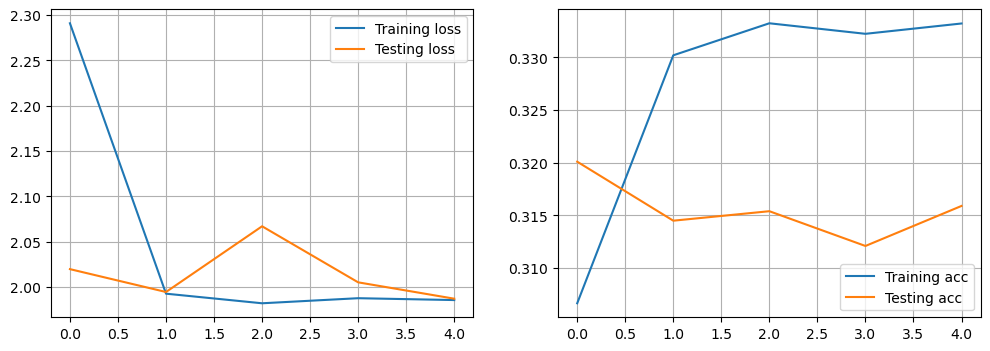

In [27]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_sl.history['loss'], label='Training loss')
ax1.plot(log_sl.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log_sl.history['accuracy'], label='Training acc')
ax2.plot(log_sl.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Evaluate single-layer model
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [28]:
loss_test, metric_test = sl_model.evaluate(X_val, Y_val) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9872 - accuracy: 0.3159
Test loss: 1.9872184991836548
Test accuracy: 0.3158999979496002


### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 10)
(10,)


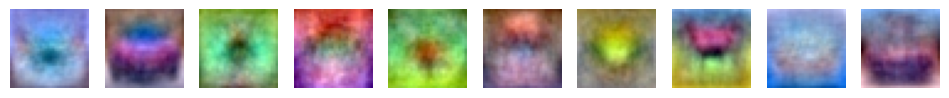

In [29]:
weights = sl_model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(32,32, 3)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

# Two-layers model

In [56]:
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
import tensorflow as tf


def twoLayerModel(name, inputshape):
    model = keras.models.Sequential(name=name)

    model.add(Dense(units=1024, activation='relu', input_shape=(inputshape,)))
    model.add(Dense(units=1024, activation='linear', input_shape=(1024,)))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dense(units=10, activation='linear', input_shape=(1024,)))
    model.add(Activation('softmax'))

    return model

#nepochs = 5           # number of epochs
#nbatch = 128          # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

twoL_model = twoLayerModel("twoLM1", D)

# ... print model information with summary() method
twoL_model.summary()

# compile model
twoL_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

Model: "twoLM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_23 (Dense)            (None, 1024)              1049600   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 10)                10250     
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________


## Train the two layers model

In [57]:
nepochs = 50           # number of epochs
nbatch = 64          # batch size

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
                                                                    # use validation set in real life
log_twoL = twoL_model.fit(X_train, Y_train, batch_size=nbatch, epochs=nepochs, validation_data=(X_val, Y_val))

Epoch 1/50
782/782 [==============================] - 14s 18ms/step - loss: 1.9225 - accuracy: 0.3122 - val_loss: 1.7841 - val_accuracy: 0.3582
Epoch 2/50
782/782 [==============================] - 14s 17ms/step - loss: 1.7319 - accuracy: 0.3736 - val_loss: 1.6833 - val_accuracy: 0.3993
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 1.6827 - accuracy: 0.3949 - val_loss: 1.7055 - val_accuracy: 0.3857
Epoch 4/50
782/782 [==============================] - 13s 17ms/step - loss: 1.6502 - accuracy: 0.4073 - val_loss: 1.6582 - val_accuracy: 0.4024
Epoch 5/50
782/782 [==============================] - 14s 17ms/step - loss: 1.6315 - accuracy: 0.4112 - val_loss: 1.6224 - val_accuracy: 0.4177
Epoch 6/50
782/782 [==============================] - 14s 17ms/step - loss: 1.6075 - accuracy: 0.4235 - val_loss: 1.6556 - val_accuracy: 0.4000
Epoch 7/50
782/782 [==============================] - 14s 17ms/step - loss: 1.5883 - accuracy: 0.4299 - val_loss: 1.6002 - val_accuracy:

## Evaluation of the two-layers model

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

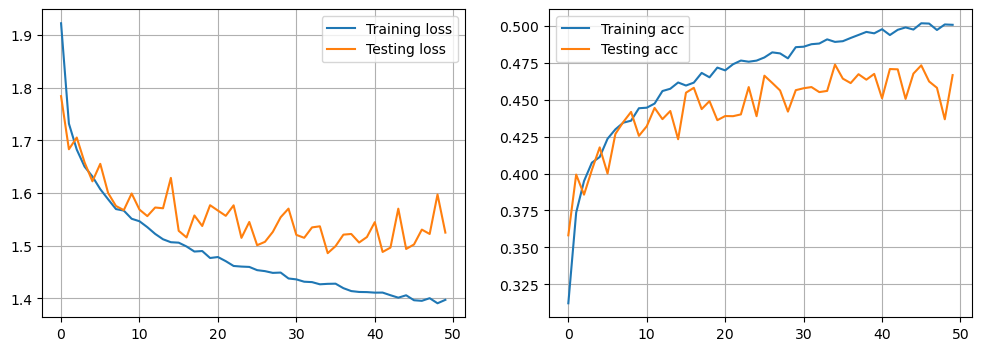

In [58]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_twoL.history['loss'], label='Training loss')
ax1.plot(log_twoL.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log_twoL.history['accuracy'], label='Training acc')
ax2.plot(log_twoL.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Evaluate two-layers model
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [16]:
loss_test, metric_test = twoL_model.evaluate(X_val, Y_val) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4155 - accuracy: 0.5026
Test loss: 1.4155350923538208
Test accuracy: 0.5026000142097473


### Confusion matrix
We can call the `predict()` function to get the predicted classes. The output of this function is an array with the predicted class probabilities, from which we need to take the argmax for each row to get the class label as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [21]:
pred = twoL_model.predict(X_val) # ...   get the output posterior probabilities
np.argmax(pred[0])

313/313 [==============================] - 1s 2ms/step


3

In [22]:
y_pred = np.argmax(pred, axis=-1) # ... get the winner labels with np.argmax()
print(y_pred[:10])
print(y_val[:10])
cm = confusion_matrix(y_val, y_pred) # ... get the confusion matrix with scikit learn confusion_matrix()
print(cm)

[3 9 8 8 4 6 1 6 2 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]
[[545  42  57  20  31  28  16  59 106  96]
 [ 29 590  15  16  12  23  17  32  47 219]
 [ 61  21 306  73 155 115  97 113  15  44]
 [ 33  21  76 305  66 226  82 102  27  62]
 [ 44  14 107  47 446  63  97 147  19  16]
 [ 16  12  53 183  71 431  50 121  20  43]
 [  5  16  77 109 120  86 506  43  10  28]
 [ 29  18  42  52  64  80  11 650   5  49]
 [104  72  12  30  31  32  10  24 595  90]
 [ 25 150  17  21  10  16  21  52  36 652]]


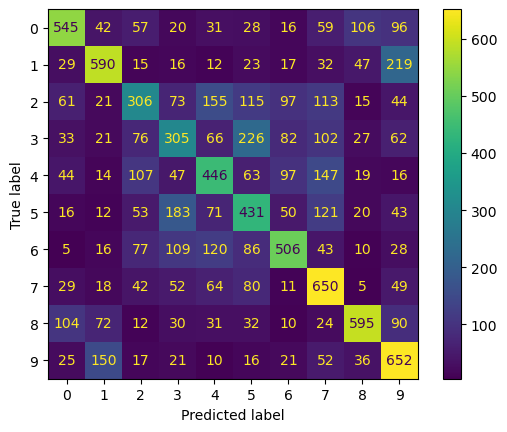

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()